In [7]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import seaborn as sns
plt.style.use('seaborn-white')

In [8]:
directory = '../data/raw/logs/throughput'

In [9]:
def get_log_files(pattern):
    result = []
    for filename in os.listdir(directory):
        data_size = re.search(pattern, filename)
        if data_size:
            result.append((data_size[1], filename))
    return result

In [10]:
def get_kafka_log_files():
    return get_log_files("kafka_producer_log_(\d+).csv")

In [11]:
def get_rembrandt_log_files():
    return get_log_files("rembrandt_producer_log_(\d+).csv")

In [18]:
def create_dataframe(log_files):
    joined_df = pd.DataFrame()
    for data_size, filename in log_files:
        df  = pd.read_csv(directory + "/" + filename, sep='\t')
        df["Message Size in Bytes"] = int(data_size)
        df = df[df["Number of Messages"] != 0]
        joined_df = pd.concat([joined_df, df])
    return joined_df

In [16]:
kafka_log_files = get_kafka_log_files()

In [19]:
kafka_df = create_dataframe(kafka_log_files)

In [24]:
def plot_histogram(dataframe):
    fig_dims = (18, 12)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.set(font_scale=2)
    sns.boxplot(x="Message Size in Bytes", y="Throughput in MB/s", data=dataframe, ax=ax)

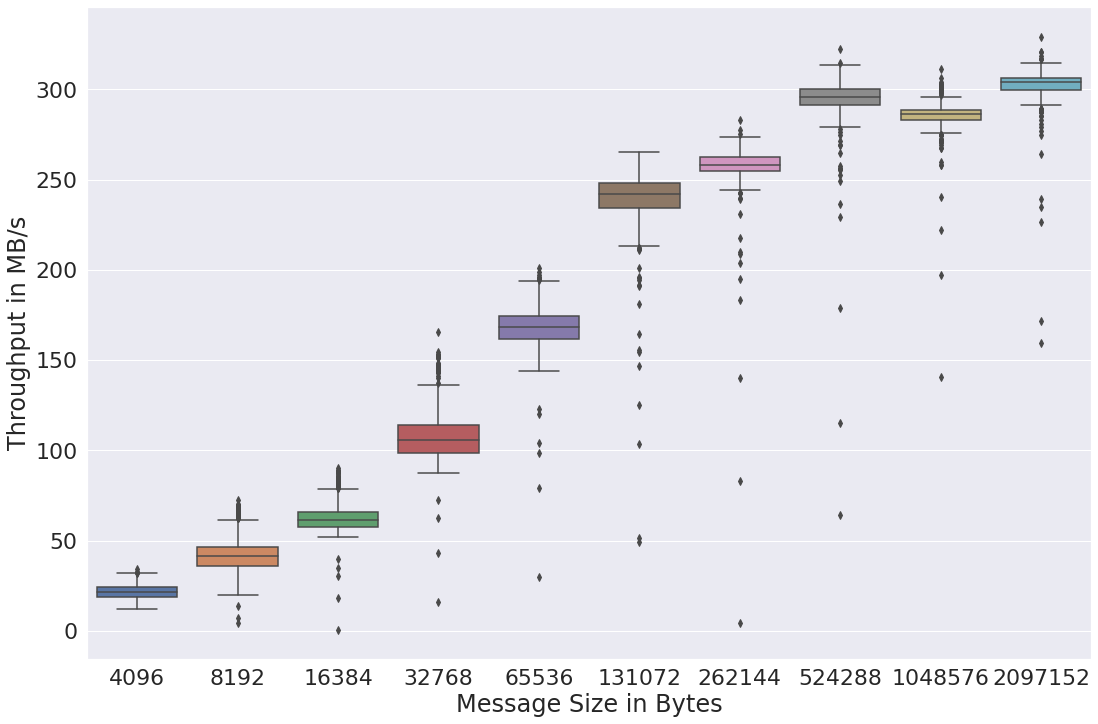

In [26]:
plot_histogram(kafka_df)

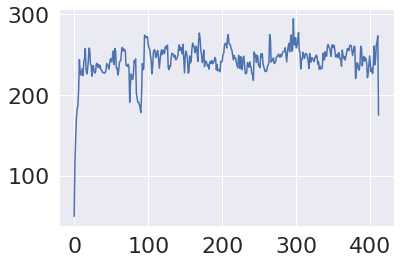

In [19]:
df[df["Message Size in Bytes"] == 131072]["Throughput in MB/s"].plot()

In [27]:
rembrandt_log_files = get_rembrandt_log_files()
rembrandt_df = create_dataframe(rembrandt_log_files)

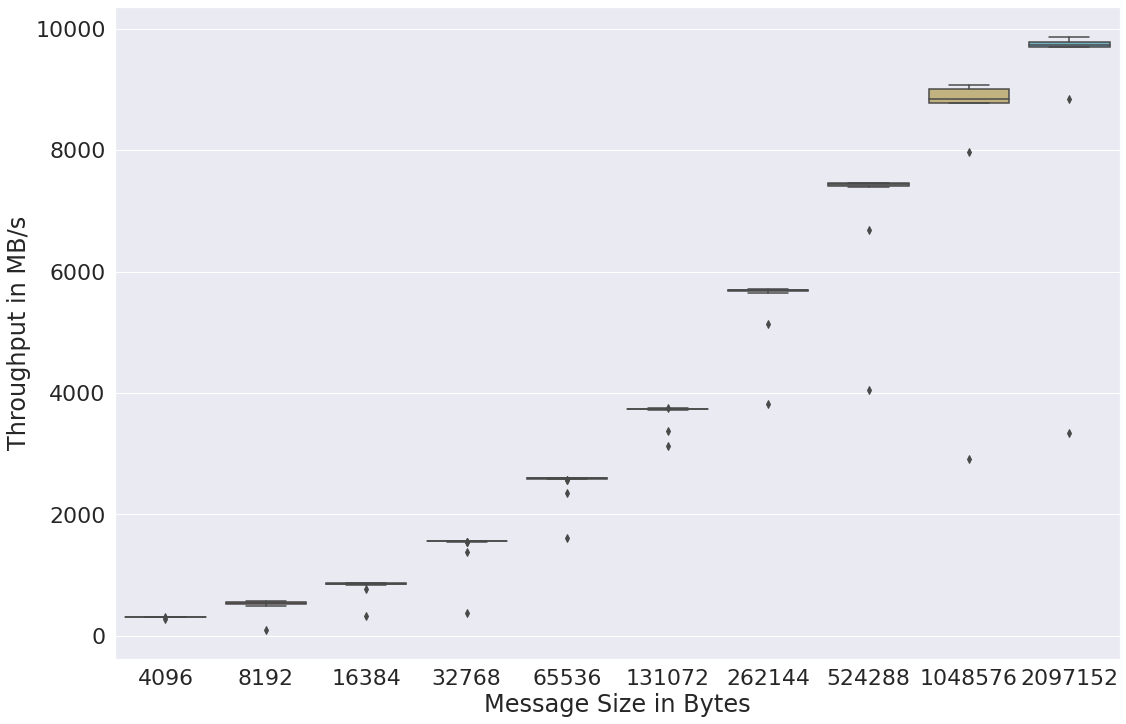

In [29]:
plot_histogram(rembrandt_df)

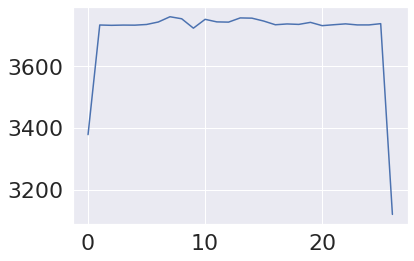

In [30]:
rembrandt_df[rembrandt_df["Message Size in Bytes"] == 131072]["Throughput in MB/s"].plot()